In [1]:
!pip install -q tfds-nightly tensorflow matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 36.4 MB/s eta 0:00:00


In [4]:
#tfds.list_builders()
builder = tfds.builder('pneumonia_mnist')
# Creating the tfrecord files (no-op if already exists)
builder.download_and_prepare()
# Loading the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [5]:
images = ds.take(1)
for example in images:
  print(example)



{'image': <tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
array([[[141],
        [139],
        [123],
        [109],
        [110],
        [115],
        [129],
        [151],
        [172],
        [186],
        [207],
        [222],
        [226],
        [223],
        [223],
        [226],
        [227],
        [233],
        [222],
        [202],
        [183],
        [162],
        [150],
        [155],
        [127],
        [130],
        [135],
        [141]],

       [[126],
        [132],
        [125],
        [118],
        [120],
        [122],
        [131],
        [149],
        [163],
        [175],
        [195],
        [211],
        [216],
        [214],
        [215],
        [218],
        [221],
        [224],
        [210],
        [185],
        [164],
        [140],
        [126],
        [130],
        [136],
        [133],
        [132],
        [135]],

       [[128],
        [131],
        [123],
        [120],
        [127],
        [126],
     

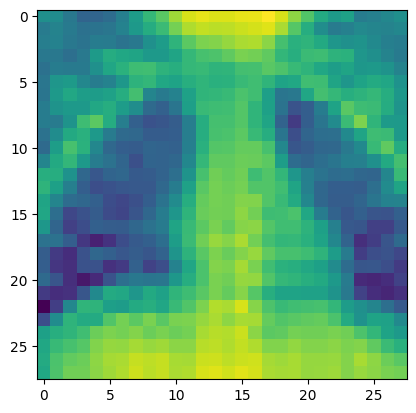

In [6]:
example = example["image"].numpy()
plt.imshow(example)


In [7]:
# Load as dictionary
ds = tfds.load('pneumonia_mnist', split='train', as_supervised=True)
ds = ds.take(10)

for image, label in ds:  # example is (image, label)
  print(image.shape, label)

(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)


In [8]:
# Load as dataframe
ds, info = tfds.load('pneumonia_mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

,image,label
0,,0 (Normal)
1,,1 (Pneumonia)
2,,0 (Normal)
3,,1 (Pneumonia)


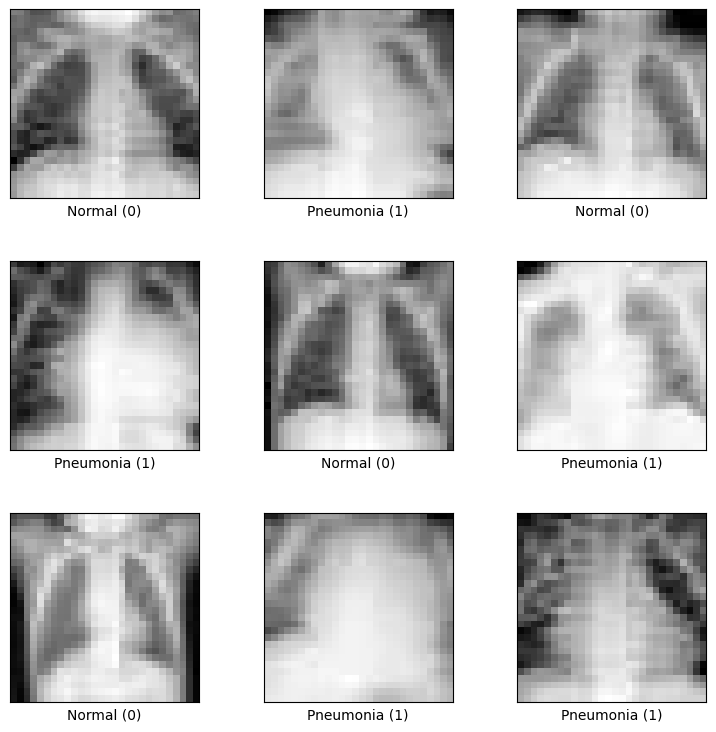

In [9]:
# Show examples
fig = tfds.show_examples(ds, info)

In [10]:
# Load dataset with access to the metadata
ds, info = tfds.load('pneumonia_mnist', with_info=True)
builder = tfds.builder('pneumonia_mnist')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='pneumonia_mnist',
    full_name='pneumonia_mnist/1.0.0',
    description="""
    # MedMNIST Pneumonia Dataset
    
    The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray
    images. The task is binary-class classification of pneumonia against normal. The
    source training set is split with a ratio of 9:1 into training and validation
    set, and use its source validation set as the test set. The source images are
    gray-scale, and their sizes are (384–2,916) × (127–2,713). The images are
    center-cropped with a window size of length of the short edge and resized into 1
    × 28 × 28.
    """,
    homepage='https://medmnist.com//',
    data_dir='/root/tensorflow_datasets/pneumonia_mnist/1.0.0',
    file_format=tfrecord,
    download_size=3.98 MiB,
    dataset_size=3.66 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),

In [11]:
# Load training set as dataframe
ds_train, info_train = tfds.load('pneumonia_mnist', split='train', with_info=True)

tfds.as_dataframe(ds_train.take(5), info_train)
len(ds_train)
for example in ds_train:
  print(example)

Streaming output truncated to the last 5000 lines.
        [183],
        [169],
        [163],
        [160],
        [151],
        [146],
        [137],
        [120],
        [102],
        [ 88],
        [ 77],
        [ 76]],

       [[103],
        [113],
        [126],
        [138],
        [143],
        [143],
        [141],
        [140],
        [145],
        [148],
        [156],
        [166],
        [177],
        [185],
        [188],
        [189],
        [185],
        [172],
        [156],
        [148],
        [146],
        [140],
        [127],
        [115],
        [ 85],
        [ 79],
        [ 78],
        [ 85]],

       [[131],
        [137],
        [145],
        [151],
        [153],
        [152],
        [152],
        [151],
        [154],
        [157],
        [163],
        [171],
        [180],
        [186],
        [188],
        [188],
        [190],
        [180],
        [167],
        [159],
        [157],
        [152],
        [142],


In [12]:
# Load test set as dataframe
ds_test, info_test = tfds.load('pneumonia_mnist', split='test', with_info=True)

tfds.as_dataframe(ds_test.take(5), info_test)
len(ds_test)
for exapmle in ds_test:
  print(example)


Streaming output truncated to the last 5000 lines.
        [183],
        [180],
        [177],
        [177],
        [176],
        [172],
        [165],
        [159],
        [146],
        [115],
        [ 80],
        [ 66]],

       [[151],
        [162],
        [171],
        [174],
        [176],
        [179],
        [181],
        [179],
        [182],
        [182],
        [183],
        [186],
        [189],
        [190],
        [189],
        [187],
        [177],
        [177],
        [177],
        [176],
        [174],
        [170],
        [166],
        [164],
        [144],
        [132],
        [119],
        [114]],

       [[155],
        [165],
        [174],
        [177],
        [178],
        [181],
        [182],
        [181],
        [182],
        [182],
        [183],
        [186],
        [189],
        [190],
        [188],
        [186],
        [179],
        [179],
        [177],
        [174],
        [171],
        [167],
        [164],


In [13]:
pip install tensorflow tensorflow-datasets matplotlib

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import tensorflow_datasets as tfds

In [15]:
# Step 1: Load and preprocess the pneumonia dataset
def load_pneumonia_data():
    ds, info = tfds.load('pneumonia_mnist', split='train', as_supervised=True, with_info=True)
    ds_test = tfds.load('pneumonia_mnist', split='test', as_supervised=True)

    # Normalize and batch the dataset
    def preprocess(image, label):
        image = tf.image.resize(image, (28, 28))  # Ensure consistent size
        image = tf.cast(image, tf.float32) / 255.0  # Normalize
        return image, label

    ds = ds.map(preprocess).batch(128).shuffle(1000)
    ds_test = ds_test.map(preprocess).batch(128)
    return ds, ds_test, info

train_ds, test_ds, dataset_info = load_pneumonia_data()

In [16]:
# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [17]:
# Encoder
latent_dim = 2
encoder_inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 14, 14, 32)     │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 7, 7, 64)       │         18,496 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 3136)           │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 16)             │         50,192 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │             34 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │             34 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling (Sampling)       │ (None, 2)              │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3136)                │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    def compile(self, optimizer):
        super().compile()  # Use base Model.compile
        self.optimizer = optimizer  # Save optimizer instance

    @property
    def metrics(self):
        # Defining the metrics to track during training
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        # Unpack data
        images, _ = data
        with tf.GradientTape() as tape:
            # Forward pass
            z_mean, z_log_var, z = self.encoder(images)
            reconstructed = self.decoder(z)

            # Compute reconstruction and KL loss
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(images, reconstructed),
                    axis=(1, 2),
                )
            )
            kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + kl_loss

        # Backpropagation
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Update metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        # Unpack data
        images, _ = data
        z_mean, z_log_var, z = self.encoder(images)
        reconstructed = self.decoder(z)

        # Computing reconstruction and KL loss
        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                tf.keras.losses.binary_crossentropy(images, reconstructed),
                axis=(1, 2),
            )
        )
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        total_loss = reconstruction_loss + kl_loss

        # Update metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [20]:
vae = VAE(encoder, decoder)

# Compiling the model without loss passed to fit
vae.compile(optimizer=tf.keras.optimizers.Adam())

# Training the model
history = vae.fit(train_ds, epochs=10, validation_data=test_ds)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - kl_loss: 0.2660 - loss: 535.3552 - reconstruction_loss: 535.0892 - val_kl_loss: 0.0018 - val_loss: 522.0963 - val_reconstruction_loss: 522.0945
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - kl_loss: 9.2495e-04 - loss: 520.2494 - reconstruction_loss: 520.2485 - val_kl_loss: 5.3075e-04 - val_loss: 520.0507 - val_reconstruction_loss: 520.0500
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - kl_loss: 0.0025 - loss: 518.4520 - reconstruction_loss: 518.4495 - val_kl_loss: 0.0115 - val_loss: 519.0999 - val_reconstruction_loss: 519.0884
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 274ms/step - kl_loss: 0.0479 - loss: 518.0283 - reconstruction_loss: 517.9803 - val_kl_loss: 0.4929 - val_loss: 516.9781 - val_reconstruction_loss: 516.4852
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - kl_loss: 0.4991 - loss: 514.7430 - reconstruction_loss: 514.2440 - val_kl_loss: 1.1839 - val_loss: 512.2681 - val_reconstruction_loss: 511.084

In [ ]:
vae.save('vae_model.h5')

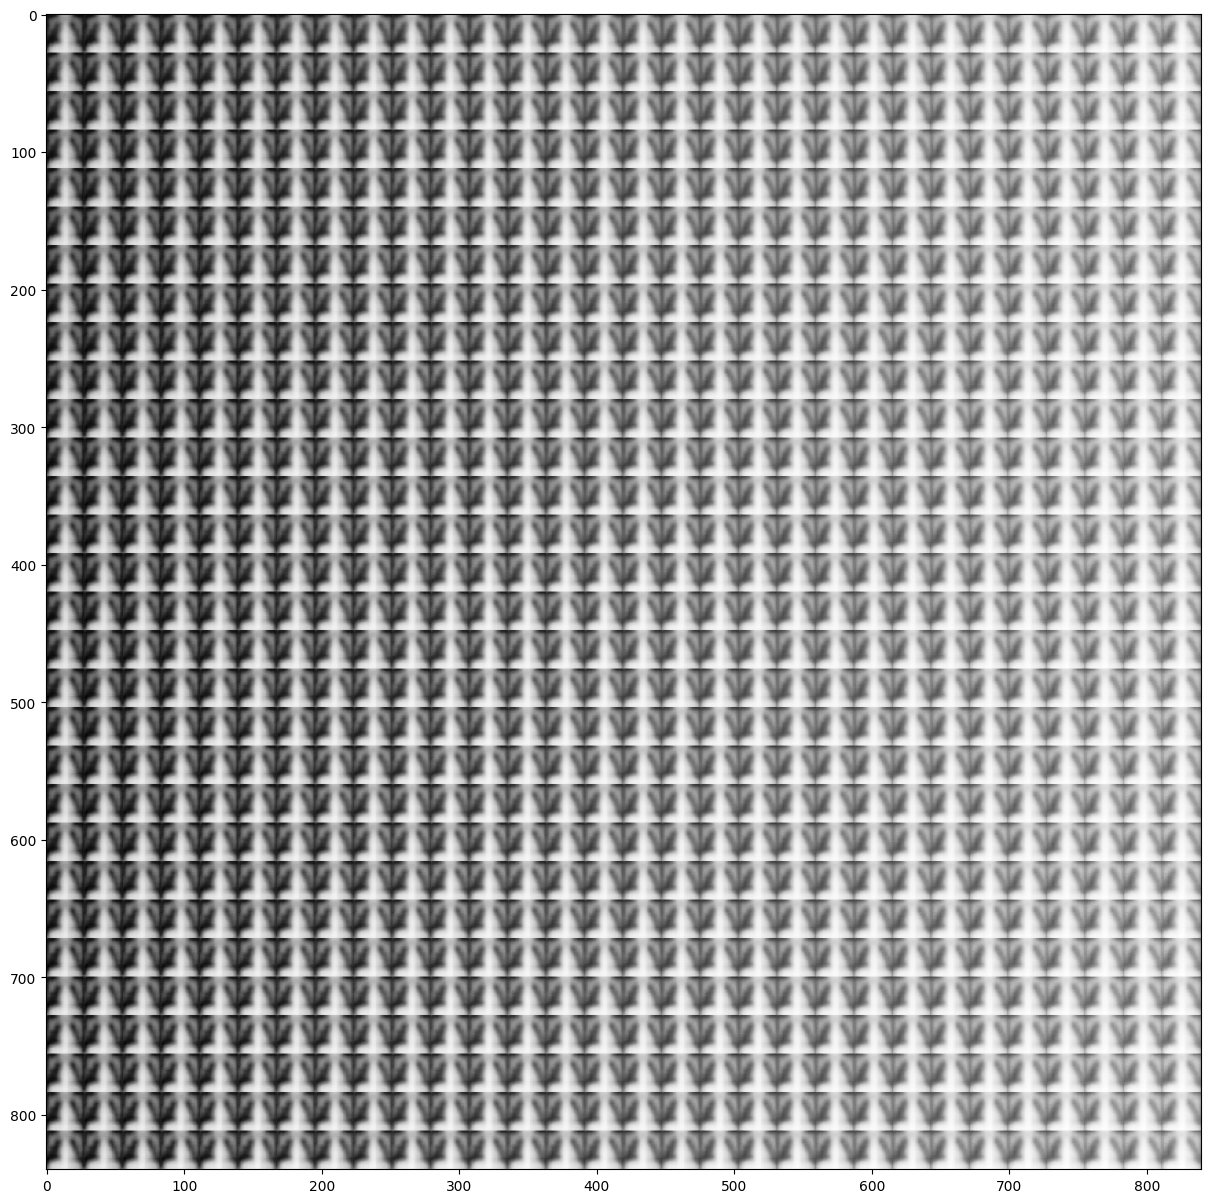

In [22]:
# Step 7: Visualize Results
def plot_latent_space(vae, n=30, figsize=15):
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    import matplotlib.pyplot as plt
    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

plot_latent_space(vae)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

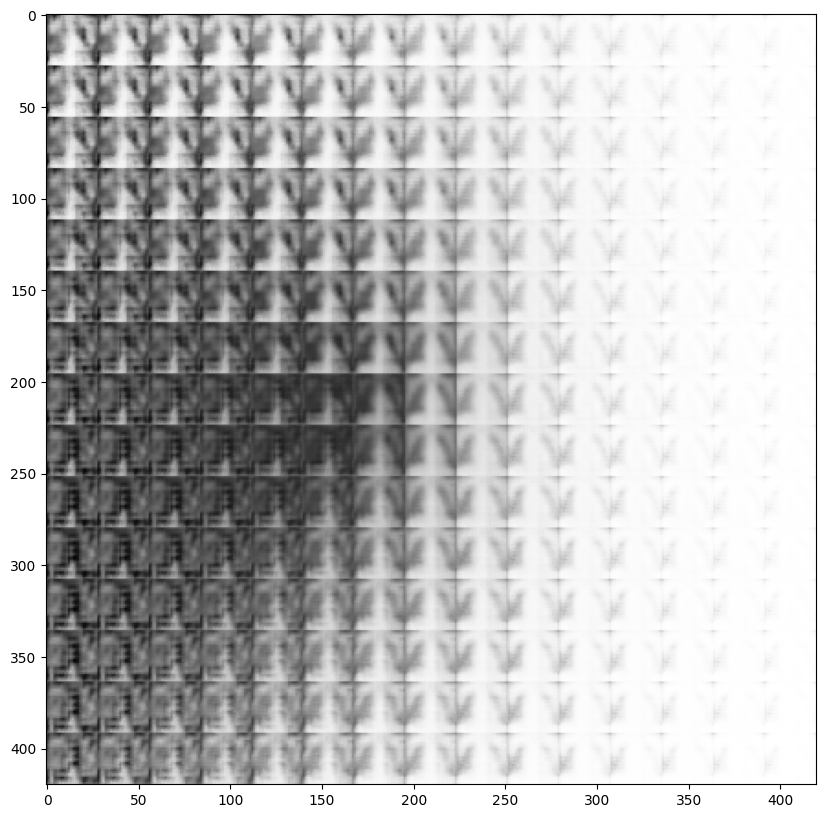

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Test the VAE
x_test_encoded = encoder.predict(test_ds.map(lambda x, y: x).unbatch().batch(128))  # Extract images only

n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])  # Generate latent space points
        x_decoded = decoder.predict(z_sample)  # Decode latent points into images
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[
            i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size,
        ] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="Greys_r")
plt.show()


Saving OIP (3).jpeg to OIP (3).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


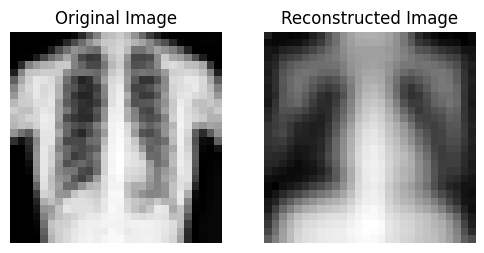

In [24]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def upload_and_predict_colab(model):
    # Upload an image file
    uploaded = files.upload()  # Opens a file dialog in the Colab UI

    for file_name in uploaded.keys():
        # Load and preprocess the image
        image = Image.open(file_name).convert('L')  # Convert to grayscale
        image = image.resize((28, 28))  # Resize to match model input shape
        image_array = np.array(image) / 255.0  # Normalize the pixel values
        image_array = np.expand_dims(image_array, axis=[0, -1])  # Add batch and channel dimensions

        # Predict using the trained model
        z_mean, z_log_var, z = model.encoder.predict(image_array)
        reconstructed_image = model.decoder.predict(z)

        # Display the original and reconstructed images
        plt.figure(figsize=(6, 3))

        # Original image
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        # Reconstructed image
        plt.subplot(1, 2, 2)
        plt.title("Reconstructed Image")
        plt.imshow(reconstructed_image[0, :, :, 0], cmap='gray')
        plt.axis('off')

        plt.show()

# Calling the function
upload_and_predict_colab(vae)
